Jacob Rowan

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Question 1-a complete for marking

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


import seaborn as sns
from pylab import rcParams

rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

%matplotlib inline

ogData = pd.read_csv("health_survey.csv", encoding='latin1')
healthData = pd.read_csv("health_survey.csv", encoding='latin1')

for x in healthData.columns:
    if 'value' in x:
        del healthData[x]
    if 'percent' in x:
        healthData.rename(columns={x : '20'+x[8:]}, inplace = True)
healthData.rename(columns={'short.description' : 'description'}, inplace = True)
del healthData['Unnamed: 0']
healthData


,population,description,group,2016,2015,2014,2013,2012,2011,2006,2007
0,adults,Physically active,Total,50.2,47.7,50.7,52.1,51.7,54.4,52.0,NaN
1,adults,Physically active,Men,53.0,51.0,55.2,55.2,55.8,57.3,55.5,NaN
2,adults,Physically active,Women,47.6,44.5,46.5,49.1,47.9,51.7,48.8,NaN
3,adults,Physically active,15-17,47.1,41.7,49.6,46.7,52.7,58.1,58.6,NaN
4,adults,Physically active,18-24,53.5,49.7,52.6,53.7,54.9,57.4,55.3,NaN
5,adults,Physically active,15-24,51.7,47.3,51.7,51.6,54.3,57.6,56.5,NaN
6,adults,Physically active,25-34,52.6,48.7,53.8,53.7,53.2,56.0,54.8,NaN
7,adults,Physically active,35-44,53.2,49.9,51.0,53.4,52.0,56.5,52.7,NaN
8,adults,Physically active,45-54,52.7,49.7,54.4,53.3,54.6,56.1,52.4,NaN
9,adults,Physically active,55-64,50.7,51.1,52.3,53.8,53.1,57.5,52.1,NaN


In [3]:
#Question 1-b Complete for marking
uniqueDesc = set(healthData['description'])
uniqueDesc2 = healthData['description'].unique()
#print(uniqueDesc)
print(uniqueDesc2)


myHealth = healthData[(healthData.group == 'Total') & (healthData.population == 'adults') & ((healthData.description == 'Mood and/or anxiety disorder') | (healthData.description == 'Anxiety disorder') | (healthData.description == 'Underweight') | (healthData.description == 'Depression') | (healthData.description == 'Physically active') | (healthData.description == 'Daily smokers'))]

myHealth


['Physically active' 'After-hours medical centre visit'
 'Past-year drinkers' 'Amphetamine use (total population)'
 'Amphetamine use (16-64 years)' 'Anxiety disorder' 'Arthritis'
 'Asthma (medicated)' 'Bipolar disorder' 'Mean BMI (kg/m²)' 'Cannabis use'
 'Definite confidence and trust in GP' 'Current smokers' 'Daily smokers'
 'Only visit dental health care worker for problems'
 'Dental health care worker visit' 'Depression' 'Diabetes'
 'Type 2 diabetes (proxy)' 'Mean diastolic blood pressure (mmHg)'
 'Heavy episodic drinking at least monthly (total population)'
 'Heavy episodic drinking at least monthly (past-year drinkers)'
 'Heavy episodic drinking at least weekly (total population)'
 'Heavy episodic drinking at least weekly (past-year drinkers)'
 'All teeth removed due to decay' 'ED visit' 'Ex-smokers'
 'GP good at explaining health conditions and treatments' 'Fruit intake'
 'Gout' 'GP visit' 'Hazardous drinkers (total population)'
 'Hazardous drinkers (past-year drinkers)' 'Self-ra

,population,description,group,2016,2015,2014,2013,2012,2011,2006,2007
0,adults,Physically active,Total,50.2,47.7,50.7,52.1,51.7,54.4,52.0,NaN
112,adults,Anxiety disorder,Total,10.3,9.5,7.8,8.4,6.4,6.1,4.3,NaN
292,adults,Daily smokers,Total,13.8,14.2,15.0,15.7,15.6,16.3,18.3,NaN
364,adults,Depression,Total,16.7,15.4,14.6,15.5,14.5,14.3,10.4,NaN
1197,adults,Mood and/or anxiety disorder,Total,19.9,18.8,17.4,18.6,16.4,16.3,12.7,NaN
1767,adults,Underweight,Total,1.5,1.3,1.3,1.5,1.5,1.4,1.3,NaN


In [18]:
#Question 1-c Complete for marking
#wrangleHealth = myHealth
wrangleHealth = healthData[(healthData.group == 'Total') & (healthData.population == 'adults') & ((healthData.description == 'Mood and/or anxiety disorder') | (healthData.description == 'Anxiety disorder') | (healthData.description == 'Underweight') | (healthData.description == 'Depression') | (healthData.description == 'Physically active') | (healthData.description == 'Daily smokers'))]

wrangleHealth.drop(columns = ['population', 'group'], inplace = True)

wrangleHealth = wrangleHealth.transpose()

count=0
for x in wrangleHealth.columns:
    wrangleHealth.rename(columns={x : wrangleHealth.iloc[0,count]}, inplace = True)
    count+=1

wrangleHealth.drop(wrangleHealth.index[[0]], inplace=True)

#Column names were left lower case as in examples

wrangleHealth.index.name = 'year'
#wrangleHealth = wrangleHealth.reindex(index=wrangleHealth.index[::-1])
wrangleHealth = wrangleHealth.sort_index(axis=0)
wrangleHealth.columns.name = 'description'
wrangleHealth


description,Physically active,Anxiety disorder,Daily smokers,Depression,Mood and/or anxiety disorder,Underweight
year,,,,,,
2006,52,4.3,18.3,10.4,12.7,1.3
2007,NaN,NaN,NaN,NaN,NaN,NaN
2011,54.4,6.1,16.3,14.3,16.3,1.4
2012,51.7,6.4,15.6,14.5,16.4,1.5
2013,52.1,8.4,15.7,15.5,18.6,1.5
2014,50.7,7.8,15,14.6,17.4,1.3
2015,47.7,9.5,14.2,15.4,18.8,1.3
2016,50.2,10.3,13.8,16.7,19.9,1.5


In [5]:
#Question 1-d Complete for marking
def searchNoInput(grp, pop, healthRet):
    healthSearch = healthData[(healthData.group == grp) & (healthData.population == pop) & (healthData['description'].isin(healthRet))]# & (healthData.description: if x in healthRet: True)]
    #print(healthSearch)
    healthSearch.drop(columns = ['population', 'group'], inplace = True)

    healthSearch = healthSearch.transpose()

    count=0
    for x in healthSearch.columns:
        healthSearch.rename(columns={x : healthSearch.iloc[0,count]}, inplace = True)
        count+=1

    healthSearch.drop(healthSearch.index[[0]], inplace=True)
    
    #wrangTup = list(zip(healthSearch.columns))
    #wrangColumns=[(wrangTup),('year')]
    
    healthSearch.index.name = 'Year'
    healthSearch = healthSearch.sort_index(axis=0)
    healthSearch.columns.name = 'Description'
    
    return healthSearch

desc = (['Mood and/or anxiety disorder','Anxiety disorder','Underweight','Depression','Physically active','Daily smokers'])
dSet1 = searchNoInput('Total', 'adults', desc)
dSet1

Description,Physically active,Anxiety disorder,Daily smokers,Depression,Mood and/or anxiety disorder,Underweight
Year,,,,,,
2006,52,4.3,18.3,10.4,12.7,1.3
2007,NaN,NaN,NaN,NaN,NaN,NaN
2011,54.4,6.1,16.3,14.3,16.3,1.4
2012,51.7,6.4,15.6,14.5,16.4,1.5
2013,52.1,8.4,15.7,15.5,18.6,1.5
2014,50.7,7.8,15,14.6,17.4,1.3
2015,47.7,9.5,14.2,15.4,18.8,1.3
2016,50.2,10.3,13.8,16.7,19.9,1.5


In [6]:
#Question 1-d I misunderstood what was being asked and made this, it takes input returns the sorted data set.

def healthFilter():
    healthRet = []
    contLoop = True
    checkFind = False
    while(contLoop):
        pop = input("Select your chosen population: ")
        for x in healthData.population:
            if pop in x:
                print("Population found.")
                contLoop = False
                break
        if contLoop:
            print("The population you have chosen is not listed. Please try again.")
    contLoop = True
    while(contLoop):
        grp = input("Select your chosen group: ")
        for x in healthData.group:
            if grp in x:
                print("Group found.")
                contLoop = False
                break
        if contLoop:
            print("The group you have chosen is not listed. Please try again.")
    contLoop = True
    while (contLoop):
        #FIX THE VALIDATION HERE ON THE Y/N SECTION!
        desc = input("Select your chosen description: ")
        for x in healthData.description:
            if desc in x:
                healthRet.append(desc)
                checkFind = True
                print("Description found.")
                break
        if checkFind == False:
            print("Description", desc, "not found.")
        check = input("Would you like to entire another value? y/n: ")
        if(check == 'n' or check == 'N'):
            contLoop = False
    #Can't make the list convert to the thing
    #print(type(grp))
    #print(grp)
    #print(type(healthRet))
    #print(healthRet)
    healthSearch = healthData[(healthData.group == grp) & (healthData.population == pop) & (healthData['description'].isin(healthRet))]# & (healthData.description: if x in healthRet: True)]
    #COPY POINT
    healthSearch.drop(columns = ['population', 'group'], inplace = True)

    healthSearch = healthSearch.transpose()

    count=0
    for x in healthSearch.columns:
        healthSearch.rename(columns={x : healthSearch.iloc[0,count]}, inplace = True)
        count+=1

    healthSearch.drop(healthSearch.index[[0]], inplace=True)
    
    #wrangTup = list(zip(healthSearch.columns))
    #wrangColumns=[(wrangTup),('year')]
    
    healthSearch.index.name = 'Year'
    healthSearch = healthSearch.reindex(index=healthSearch.index[::-1])
    healthSearch.columns.name = 'Description'
    
    return healthSearch
#searchedHealth = healthFilter()
#searchedHealth

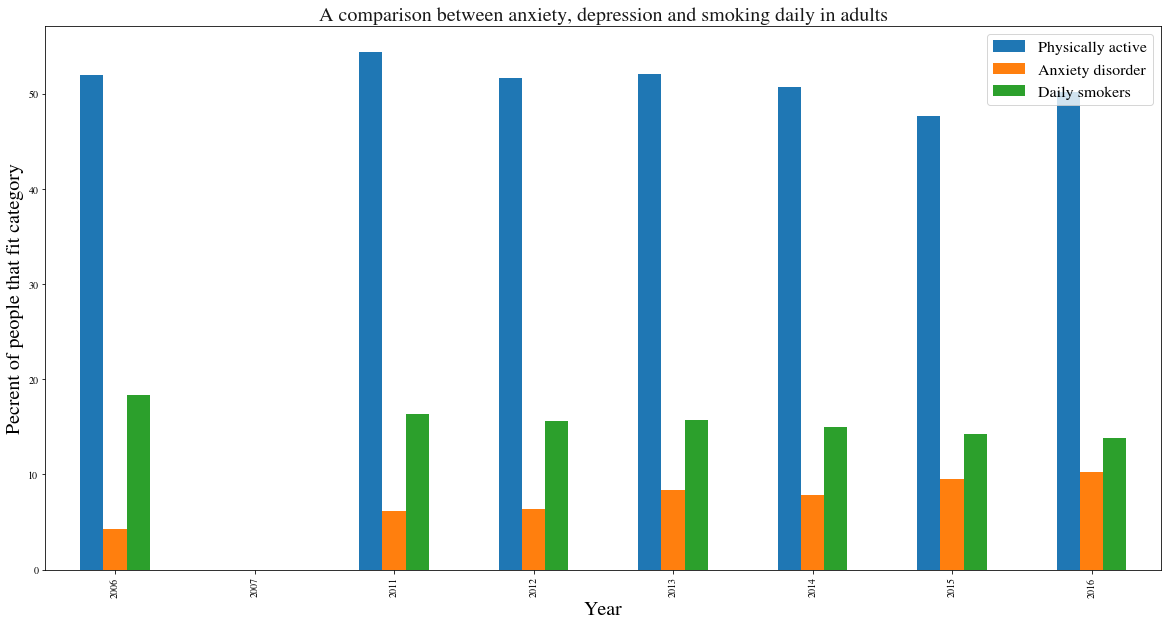

In [7]:
#Question 1-e
#I did NOT drop the nan values in 2007 by choice. These were left in to effectively display the gap in time between surveys

#Make charts to compare how common depression and anxiety is in people that are physically active
#Make charts to compare mood/underweight with daily smokers

wrangleHealth.iloc[:,0:3].plot(kind = 'bar', figsize=(20,10))
plt.title("A comparison between anxiety, depression and smoking daily in adults", alpha=.9, fontsize=20)
plt.ylabel("Pecrent of people that fit category", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.legend(loc=1, prop={'size': 16})


**Analysis of above plot**

The data for all of the observed categories is non-existent in the years 2007-2010. This could be due to a data corruption, or an unusable survey.

The data included here only incorporates individuals classified as *'adults'*.

The trend for the percentage of physically active individuals has fluctuated over the years but is showing a slight downward trend, conversely the the percentage of those experiencing anxiety disorders is showing a slow rise. There is the possibility that these two statisics have a correlation.

The rate of smoking has stayed fairly consistent, with a slight downward trend. This is contrary to what I would expect when comparing smoking to anxiety. I would anticipate that as the percentage of people with anxiety disorders increases, so would the percentage of individuals smoking.


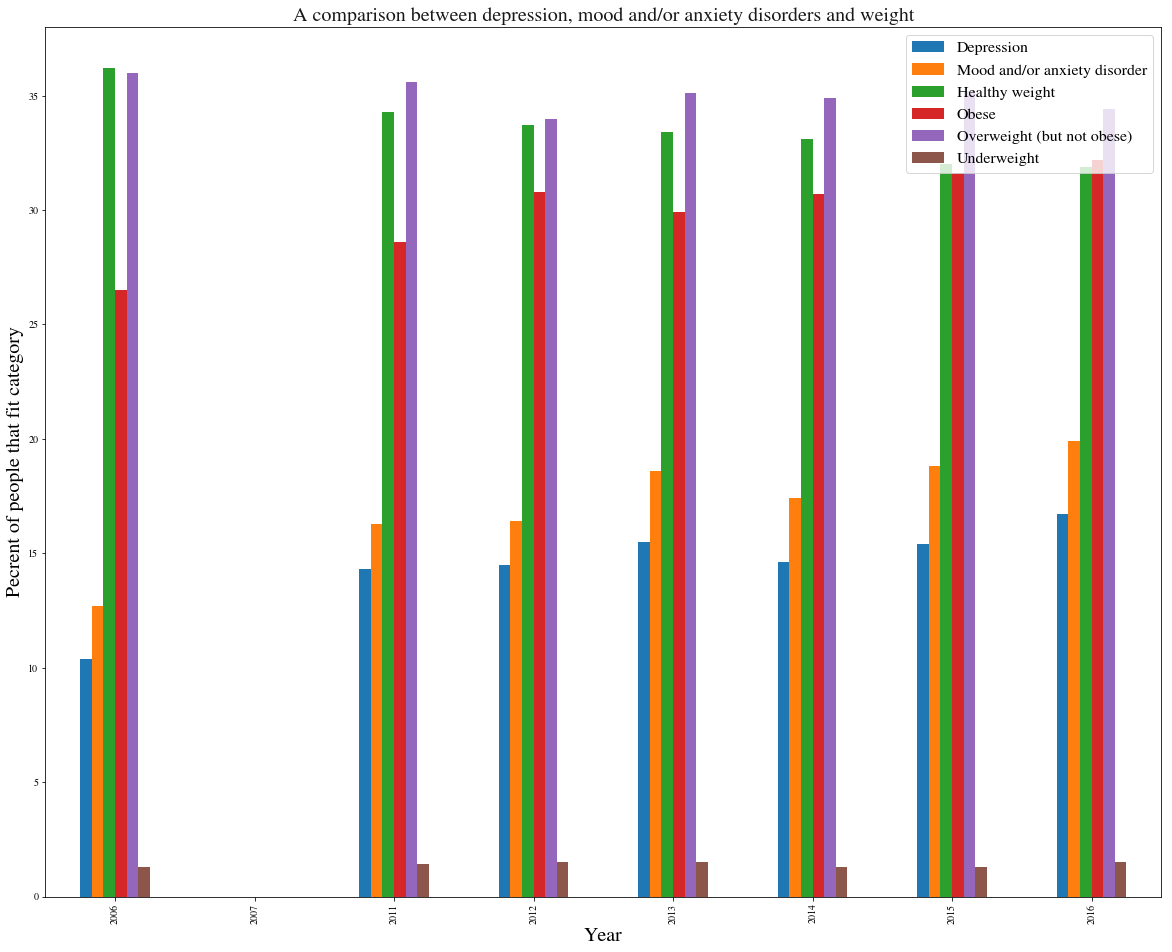

In [8]:
grp = 'Total'
pop = 'adults'
healthRet = (['Mood and/or anxiety disorder','Healthy weight','Underweight','Depression','Overweight (but not obese)','Obese'])
healthComp2 = searchNoInput(grp, pop, healthRet)
healthComp2.plot(kind = 'bar', figsize=(20,16))
plt.title("A comparison between depression, mood and/or anxiety disorders and weight", alpha=.9, fontsize=20)
plt.ylabel("Pecrent of people that fit category", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.legend(loc=1, prop={'size': 16})

**Analysis of above plot**

The data for all of the observed categories is non-existent in the years 2007-2010. This could be due to a data corruption, or an unusable survey.

As shown in the chart, rates of depression and mood/anxiety disorders in adults are increasing.
The rates of individuals with a healthy weight are decreasing, as the rates of those considered 'overweight' or 'obese' are increasing. This is logical as an individual cannot exist in both categories at the same time.

The rate of individuals that are considered underweight has stayed fairly consistent.

The rates of depression as well as mood and anxiety disorders have shown a gradual upwards trend, with minor fluctuations.

There may be some correlation between increasing weights and increasing rates of depression and mood disorders.


# Question 2

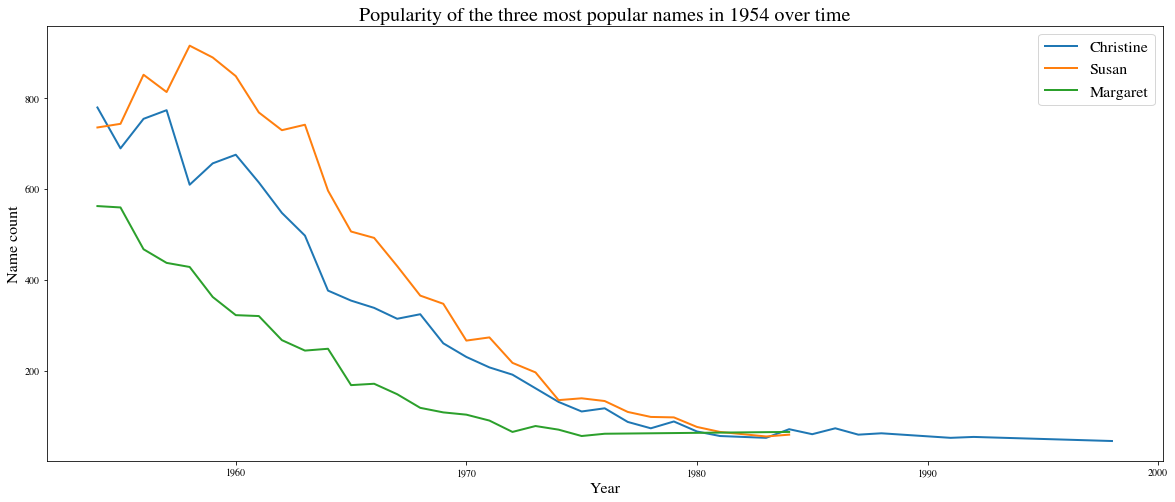

In [9]:
#Question 2-a
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm



import seaborn as sns
from pylab import rcParams

#Look up a set / style for sns ('ticks')

rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

%matplotlib inline

babyData = pd.read_csv("baby_names.csv")
babyData



plt.figure(figsize=(20,8))

sns.lineplot(x='year', y='No.', data=babyData.query("((Name == 'Christine')& (year>=1954) & (year<=2000))"), label = "Christine")
sns.lineplot(x='year', y='No.', data=babyData.query("((Name == 'Susan')& (year>=1954) & (year<=2000))"), label = "Susan")
sns.lineplot(x='year', y='No.', data=babyData.query("((Name == 'Margaret')& (year>=1954) & (year<=2000))"), label = "Margaret")
plt.title("Popularity of the three most popular names in 1954 over time", fontsize=20)
plt.ylabel("Name count", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.legend(loc=1, prop={'size': 16})




The three most popular girls names in 1954 were 'Christine', 'Susan' and 'Margaret'
All three names were considered very fashionable back in the 'olden days', however as time went on people began to think to things like "Gosh darn, these names old as hell" and "By golly I wish it didn't take so very long saying fair Margaret's name".

Due largely to the two factors mentioned above these names fell in popularity over the years, with 'Susan' and 'Margaret' falling from the top 100 names completely in the mid 80's and Christine falling in the late 90's.

And so the the movement began.

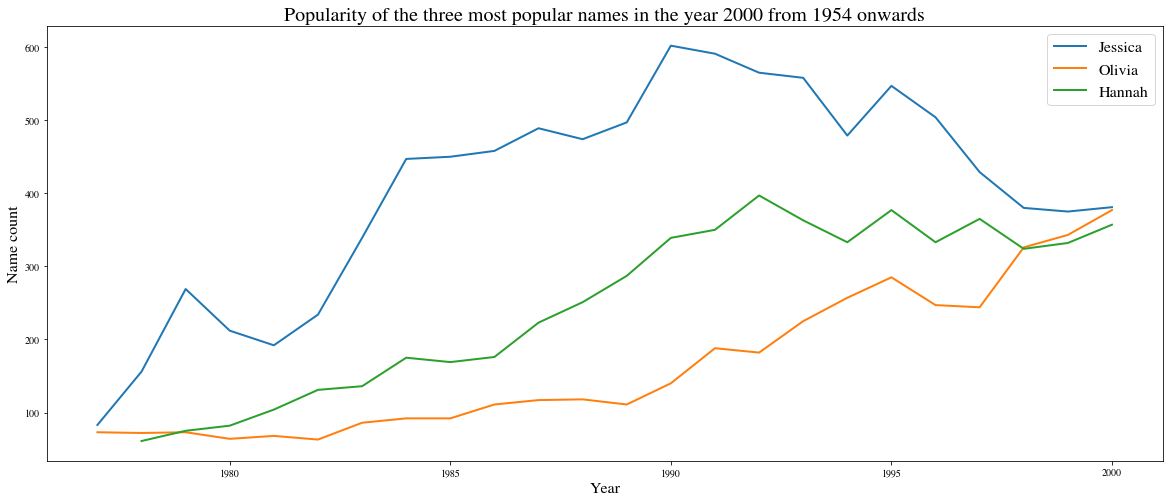

In [10]:
plt.figure(figsize=(20,8))

sns.lineplot(x='year', y='No.', data=babyData.query("((Name == 'Jessica')& (year>=1954) & (year<=2000))"), label = "Jessica")
sns.lineplot(x='year', y='No.', data=babyData.query("((Name == 'Olivia')& (year>=1954) & (year<=2000))"), label = "Olivia")
sns.lineplot(x='year', y='No.', data=babyData.query("((Name == 'Hannah')& (year>=1954) & (year<=2000))"), label = "Hannah")
plt.title("Popularity of the three most popular names in the year 2000 from 1954 onwards", fontsize=20)
plt.ylabel("Name count", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.legend(loc=1, prop={'size': 16})

In the mid 1970's was a time of change, the first easily shortenable names such as 'Jessica' or 'Jess' began to surface.
There was an initial surge in popularity as people began to latch onto this new trend.

As the decade turned to the 1980's a flood of new 'hip' easily shortenable names such as 'Sarah' (sez) 'Rebecca' (bexs) and 'Anna' (the A-Train) came to popularity.
It wasn't until the mid 80's the popularity of 'Jess' really began to show. It's sister names 'Olivia' (liv) and 'Hannah' (hey hey it's saturday hanns) were slower to grow in appeal but much more stable in their rise to power.

However in the mid 90's the name Jessica began to fall in popularity. This is attributed predominantly to Jessica Langes performance in 'a street car named desire', though there have been more recent speculations that this may have also been due to the birth of Jessie J in 1988. This more recent idea has gained traction recently as this date coincides very 'conveniently' with the initial decline in popularity after it's popularity peak in the same year.

As we go into the new millenium, assuming that trends continue 'Olivia' will become the most popular name.

Text(0.5, 0, 'Year')

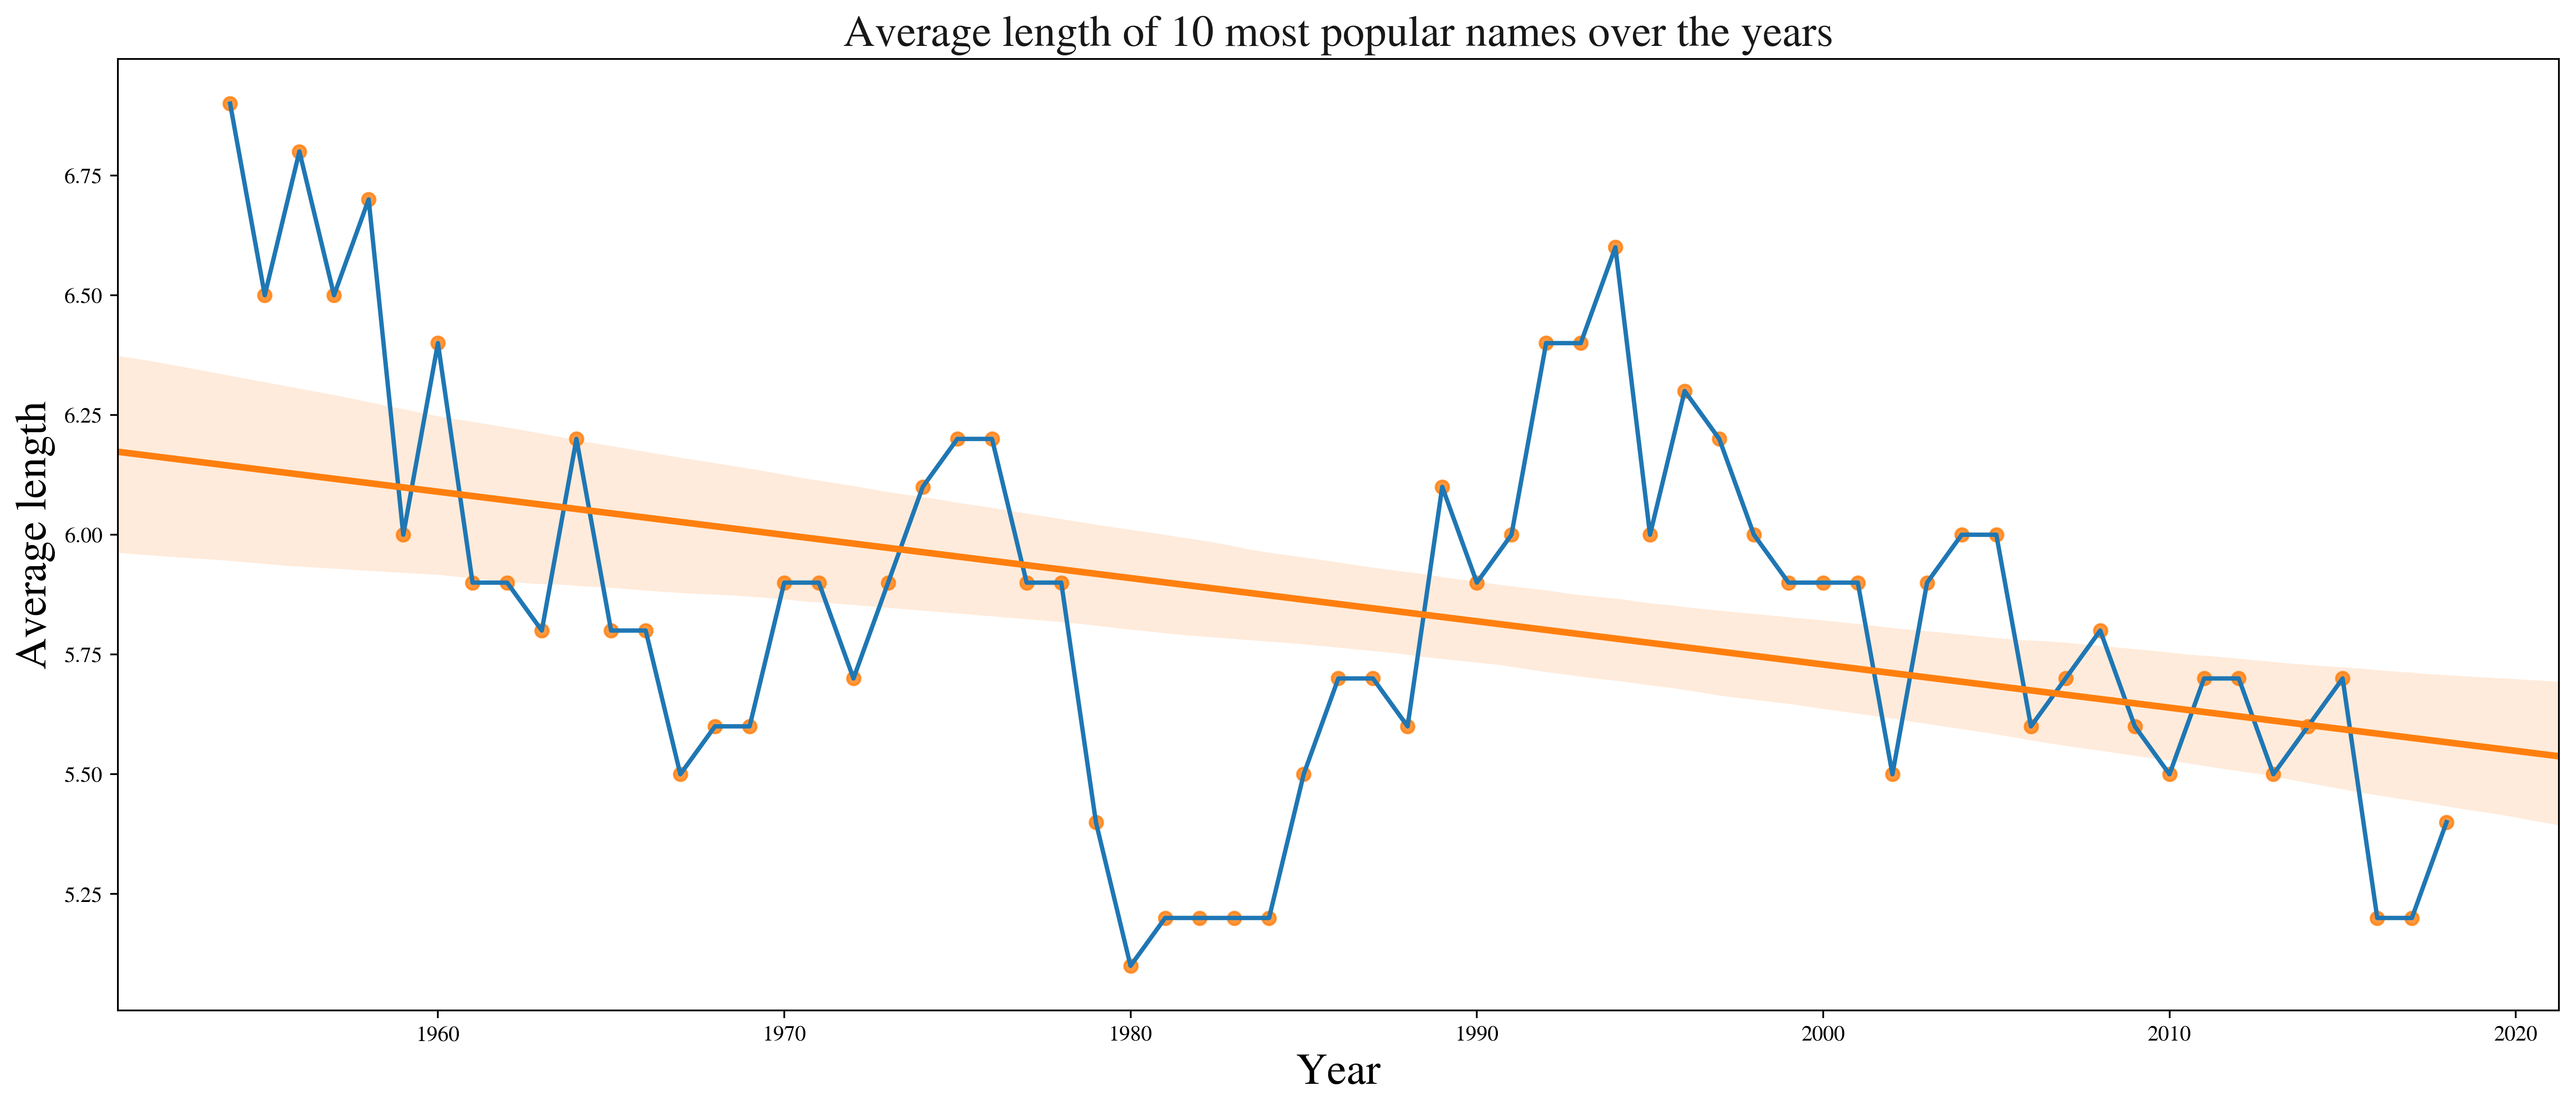

In [16]:


girlDat = babyData[(babyData.sex=='Female')]

count = 0
countN = 0
nameLen=[]
yearSet = girlDat.year.unique().tolist()

for x, row in girlDat.iterrows():
    if count<10:
        countN =  countN + len(girlDat.at[x, 'Name'])
    count+=1
    if count==100:
        countN = countN/10
        nameLen.append(countN)
        count = 0
        countN = 0

nameLength = pd.DataFrame(list(zip(nameLen,yearSet)), columns = ['Average Name Length', 'Year'])

#regression = sm.OLS(nameLength['Average Name Length'], nameLength['Year']).fit()
#regPred = regression.predict(nameLength['Year'])


plt.figure(figsize=(20,8))
sns.lineplot(x='Year', y='Average Name Length', data=nameLength)
#sns.lineplot(x='Year', y=regPred, data=nameLength)
sns.regplot('Year', 'Average Name Length', data=nameLength)
plt.title("Average length of 10 most popular names over the years", alpha=.9, fontsize=20)
plt.ylabel("Average length", fontsize=20)
plt.xlabel("Year", fontsize=20)

#trend = regression.predict(beta=regression.beta, x=x[:])

Above is a graph depicting the average name length of the 10 most popular female names between 1954 and 2019.
As you can see, after the realisation that long names were horribly uncool in the mid 1950's the transition to shorter names was a quick one. 
With a decrease in the average name length of around 1 letter in a little over 10 years, the evidence clearly shows that the popularity of longer names dropped like a stone. The name length has since flucctuated between 5 and 6 letters, and although they have not yet achieved the perfect name length as yet (3 to 4 letters) trends inidicate that this perfect balance will be achieved in the next 80 to 100 years.

An analysis on names 
    Commisioned by  Teo
    Completed by    Jake

In [12]:
#I didn't use pivot tables in my actual graph making but below is an example of how to show names that appear more than 600 times
myTab = pd.pivot_table(girlDat[girlDat['No.'] > 600], index=['Name', 'year'], values=['No.'], aggfunc={"No.":np.mean})

#The graph I will admit is a work in progress
#myTab.plot(kind='bar')

In [13]:
#Question 2-optional Complete for marking
url="https://smartstart.services.govt.nz/assets/files/Top-100-girls-and-boys-names-since-1954.xlsx"


girlsData = pd.read_excel(url, "Girls' Names", skiprows=3)
boysData = pd.read_excel(url, "Boys' Names", skiprows=3)
girlsDataOg = pd.read_excel(url, "Girls' Names", skiprows=3)
boysDataOg = pd.read_excel(url, "Boys' Names", skiprows=3)

boysData.iloc[:1] = boysData.iloc[:1].fillna(method='ffill',axis=1)
girlsData.iloc[:1] = girlsData.iloc[:1].fillna(method='ffill',axis=1)

boysData.drop(columns = ['Unnamed: 0'], inplace = True)
girlsData.drop(columns = ['Unnamed: 0'], inplace = True)

sortedGirl = pd.DataFrame(columns = ['Name','No.','year','sex'])
sortedBoy = pd.DataFrame(columns = ['Name','No.','year','sex'])

girlsData.drop(girlsData.index[[0,1,2,-1,-2,-3]], inplace = True)
name = girlsData.iloc[:,[x for x in range(1, girlsData.shape[1], 3)]]
nums = girlsData.iloc[:,[x for x in range(2, girlsData.shape[1], 3)]]
sortedGirl['Name'] = name.unstack().reset_index(drop=True)
sortedGirl['No.'] = nums.unstack().reset_index(drop=True)
year = 1954
count = 0
for x, row in sortedGirl.iterrows():
    sortedGirl.at[x, 'year'] = year
    sortedGirl.at[x, 'sex'] = 'Female'
    count+=1
    if count>=100:
        year+=1
        count = 0

boysData.drop(boysData.index[[0,1,2,-1,-2,-3]], inplace = True)
name = boysData.iloc[:,[x for x in range(1, boysData.shape[1], 3)]]
nums = boysData.iloc[:,[x for x in range(2, boysData.shape[1], 3)]]
sortedBoy['Name'] = name.unstack().reset_index(drop=True)
sortedBoy['No.'] = nums.unstack().reset_index(drop=True)
year = 1954
count = 0
for x, row in sortedBoy.iterrows():
    sortedBoy.at[x, 'year'] = year
    sortedBoy.at[x, 'sex'] = 'Male'
    count+=1
    if count>=100:
        year+=1
        count = 0
sortedGirl
sortedBoy
sortedBaby = pd.concat([sortedGirl, sortedBoy])
print(sortedBaby.head(10),'\n')
print(sortedBaby.tail(10),'\n')
print(sortedBaby.year.unique(),'\n')
print(sortedBaby.sex.unique(),'\n')
print(len(sortedBaby))
sortedBaby


        Name  No.  year     sex
0  Christine  779  1954  Female
1      Susan  735  1954  Female
2   Margaret  562  1954  Female
3     Judith  531  1954  Female
4   Jennifer  460  1954  Female
5       Mary  423  1954  Female
6  Elizabeth  419  1954  Female
7   Patricia  408  1954  Female
8      Linda  394  1954  Female
9    Barbara  382  1954  Female 

         Name No.  year   sex
6590    Micah  51  2019  Male
6591   Harley  51  2019  Male
6592    Flynn  51  2019  Male
6593  Phoenix  50  2019  Male
6594   Reuben  50  2019  Male
6595  Gabriel  49  2019  Male
6596   Elliot  49  2019  Male
6597    Nikau  48  2019  Male
6598     Leon  48  2019  Male
6599    David  48  2019  Male 

[1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015

,Name,No.,year,sex
0,Christine,779,1954,Female
1,Susan,735,1954,Female
2,Margaret,562,1954,Female
3,Judith,531,1954,Female
4,Jennifer,460,1954,Female
5,Mary,423,1954,Female
6,Elizabeth,419,1954,Female
7,Patricia,408,1954,Female
8,Linda,394,1954,Female
9,Barbara,382,1954,Female


In [14]:
#Question 3 NZ indicator data
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
import os
import string
import re


import seaborn as sns
from pylab import rcParams

rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

#Add sheet_name='poverty/education to below to read correct sheets'
documentationSetPov = pd.read_excel("Data documentation.xlsx", sheet_name='Poverty',  encoding='latin1')
documentationSetEdu = pd.read_excel("Data documentation.xlsx", sheet_name='Education',  encoding='latin1')
nzPov = pd.read_csv("nz_indicators.csv", encoding='latin1', na_values=['None', 'null', 'NULL', '-', '???', 'nan'], usecols=[*range(13,32), 92])
nzEdu = pd.read_csv("nz_indicators.csv", encoding='latin1', na_values=['None', 'null', 'NULL', '-', '???', 'nan'], usecols=[*range(56,70), 92])

nzEdu.dropna(axis = 0, how = 'all', thresh = 3, inplace = True)
nzPov.dropna(axis = 0, how = 'all', thresh = 3, inplace = True)

newName = []
oldName = []
for x in documentationSetPov['Indicator name']:
    newName.append(x)
for x in documentationSetPov['Column name in dataset']:
    oldName.append(x)

for x in nzPov.columns:
    if x in oldName:
        retN = oldName.index(x)
        nzPov.rename(columns={x: newName[retN]}, inplace= True)

newName = []
oldName = []
for x in documentationSetEdu['Indicator name']:
    newName.append(x)
for x in documentationSetEdu['Column name in dataset']:
    oldName.append(x)

for x in nzEdu.columns:
    if x in oldName:
        retN = oldName.index(x)
        nzEdu.rename(columns={x: newName[retN]}, inplace= True)
        
for x in range(len(nzPov)):
    nzPov.iloc[x,19]=nzPov.iloc[x,19][6:-4]
    nzPov.iloc[x,19] = int(nzPov.iloc[x,19])

for x in range(len(nzEdu)):
    for y in range(len(nzEdu.columns)):
        if y == 14:
            nzEdu.iloc[x,y]=nzEdu.iloc[x,y][6:-4]
            nzEdu.iloc[x,y] = int(nzEdu.iloc[x,y])
        else:
            try:
        
                nzEdu.iloc[x,y]=nzEdu.iloc[x,y][:-2]
                nzEdu.iloc[x,y] = float(nzEdu.iloc[x,y])
            except:
            #skips nan values
                continue
        #print(nzEdu.iloc[x,y][:-2])
nzEdu.set_index('year', inplace = True)
nzPov.set_index('year', inplace = True)

nzEdu.sort_index(inplace=True)
nzPov.sort_index(inplace=True)



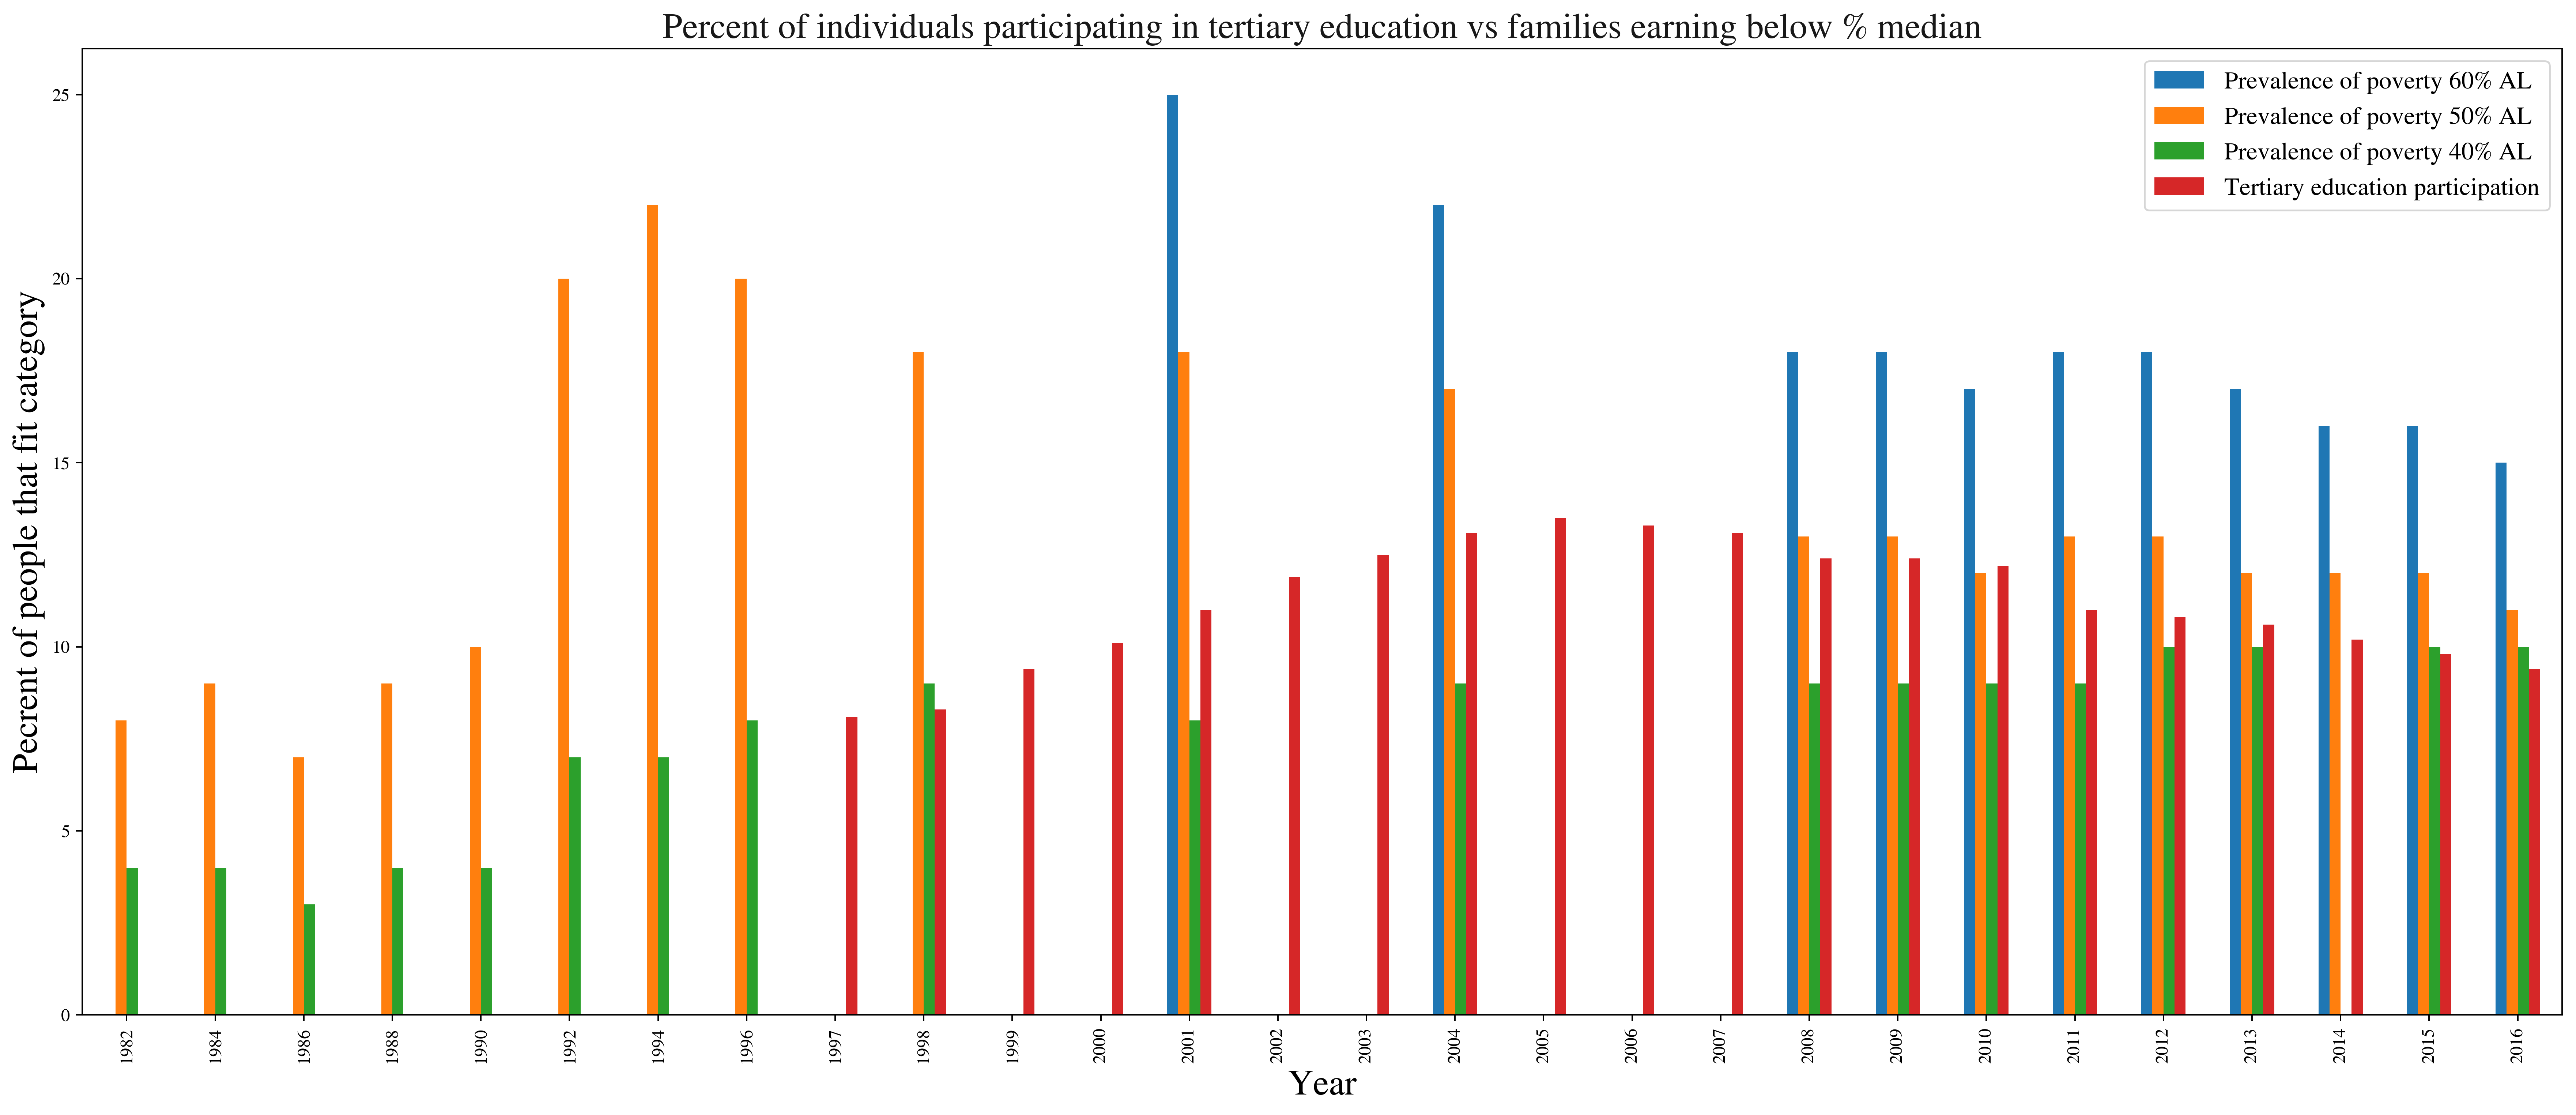

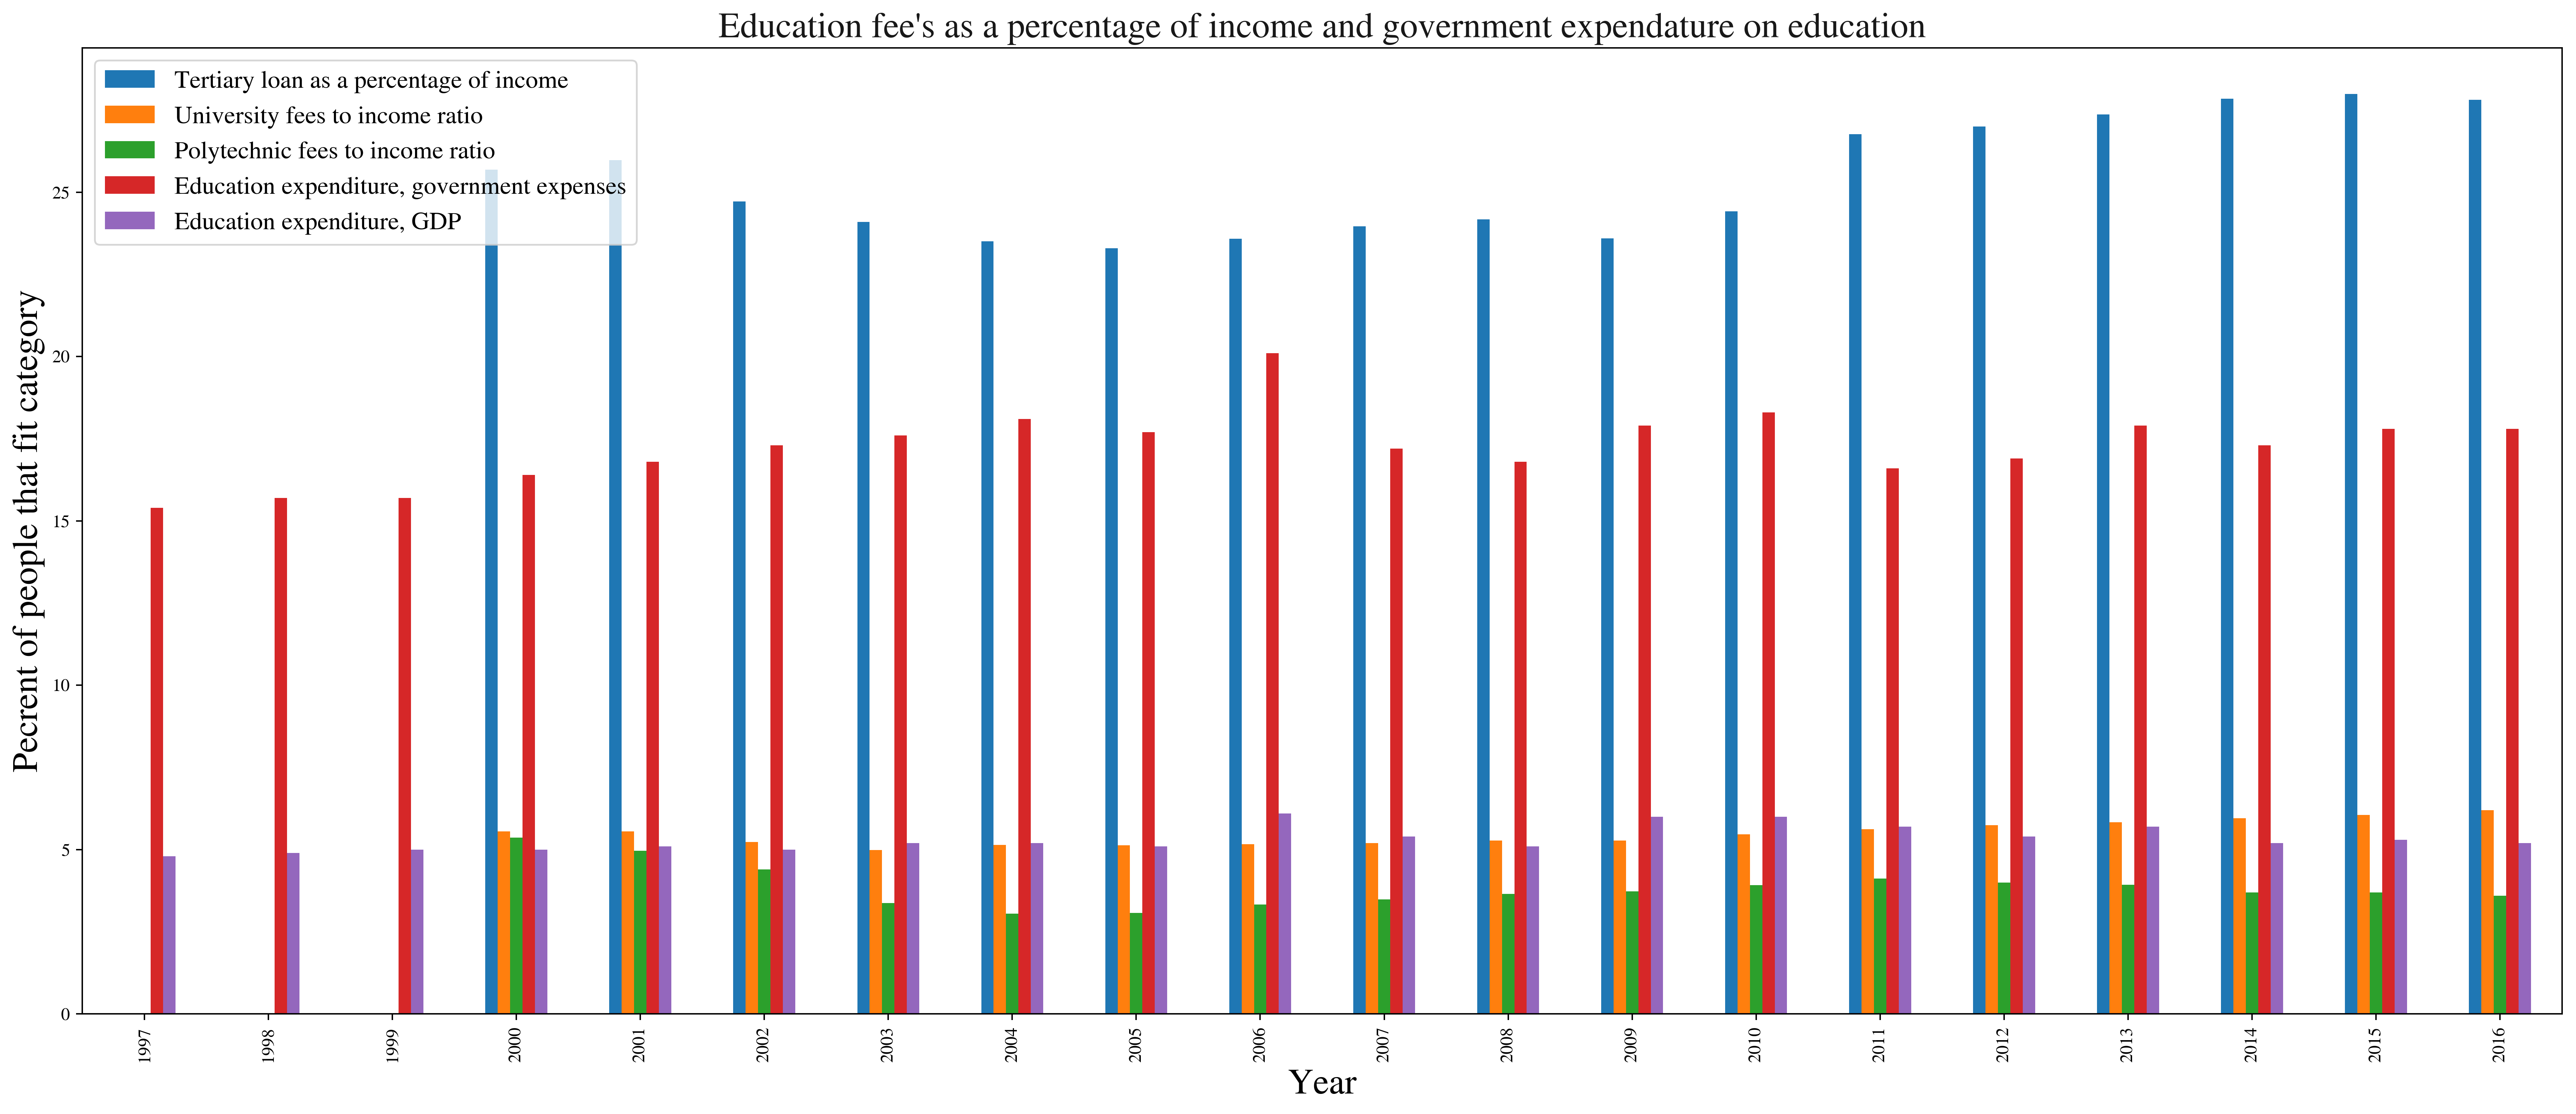

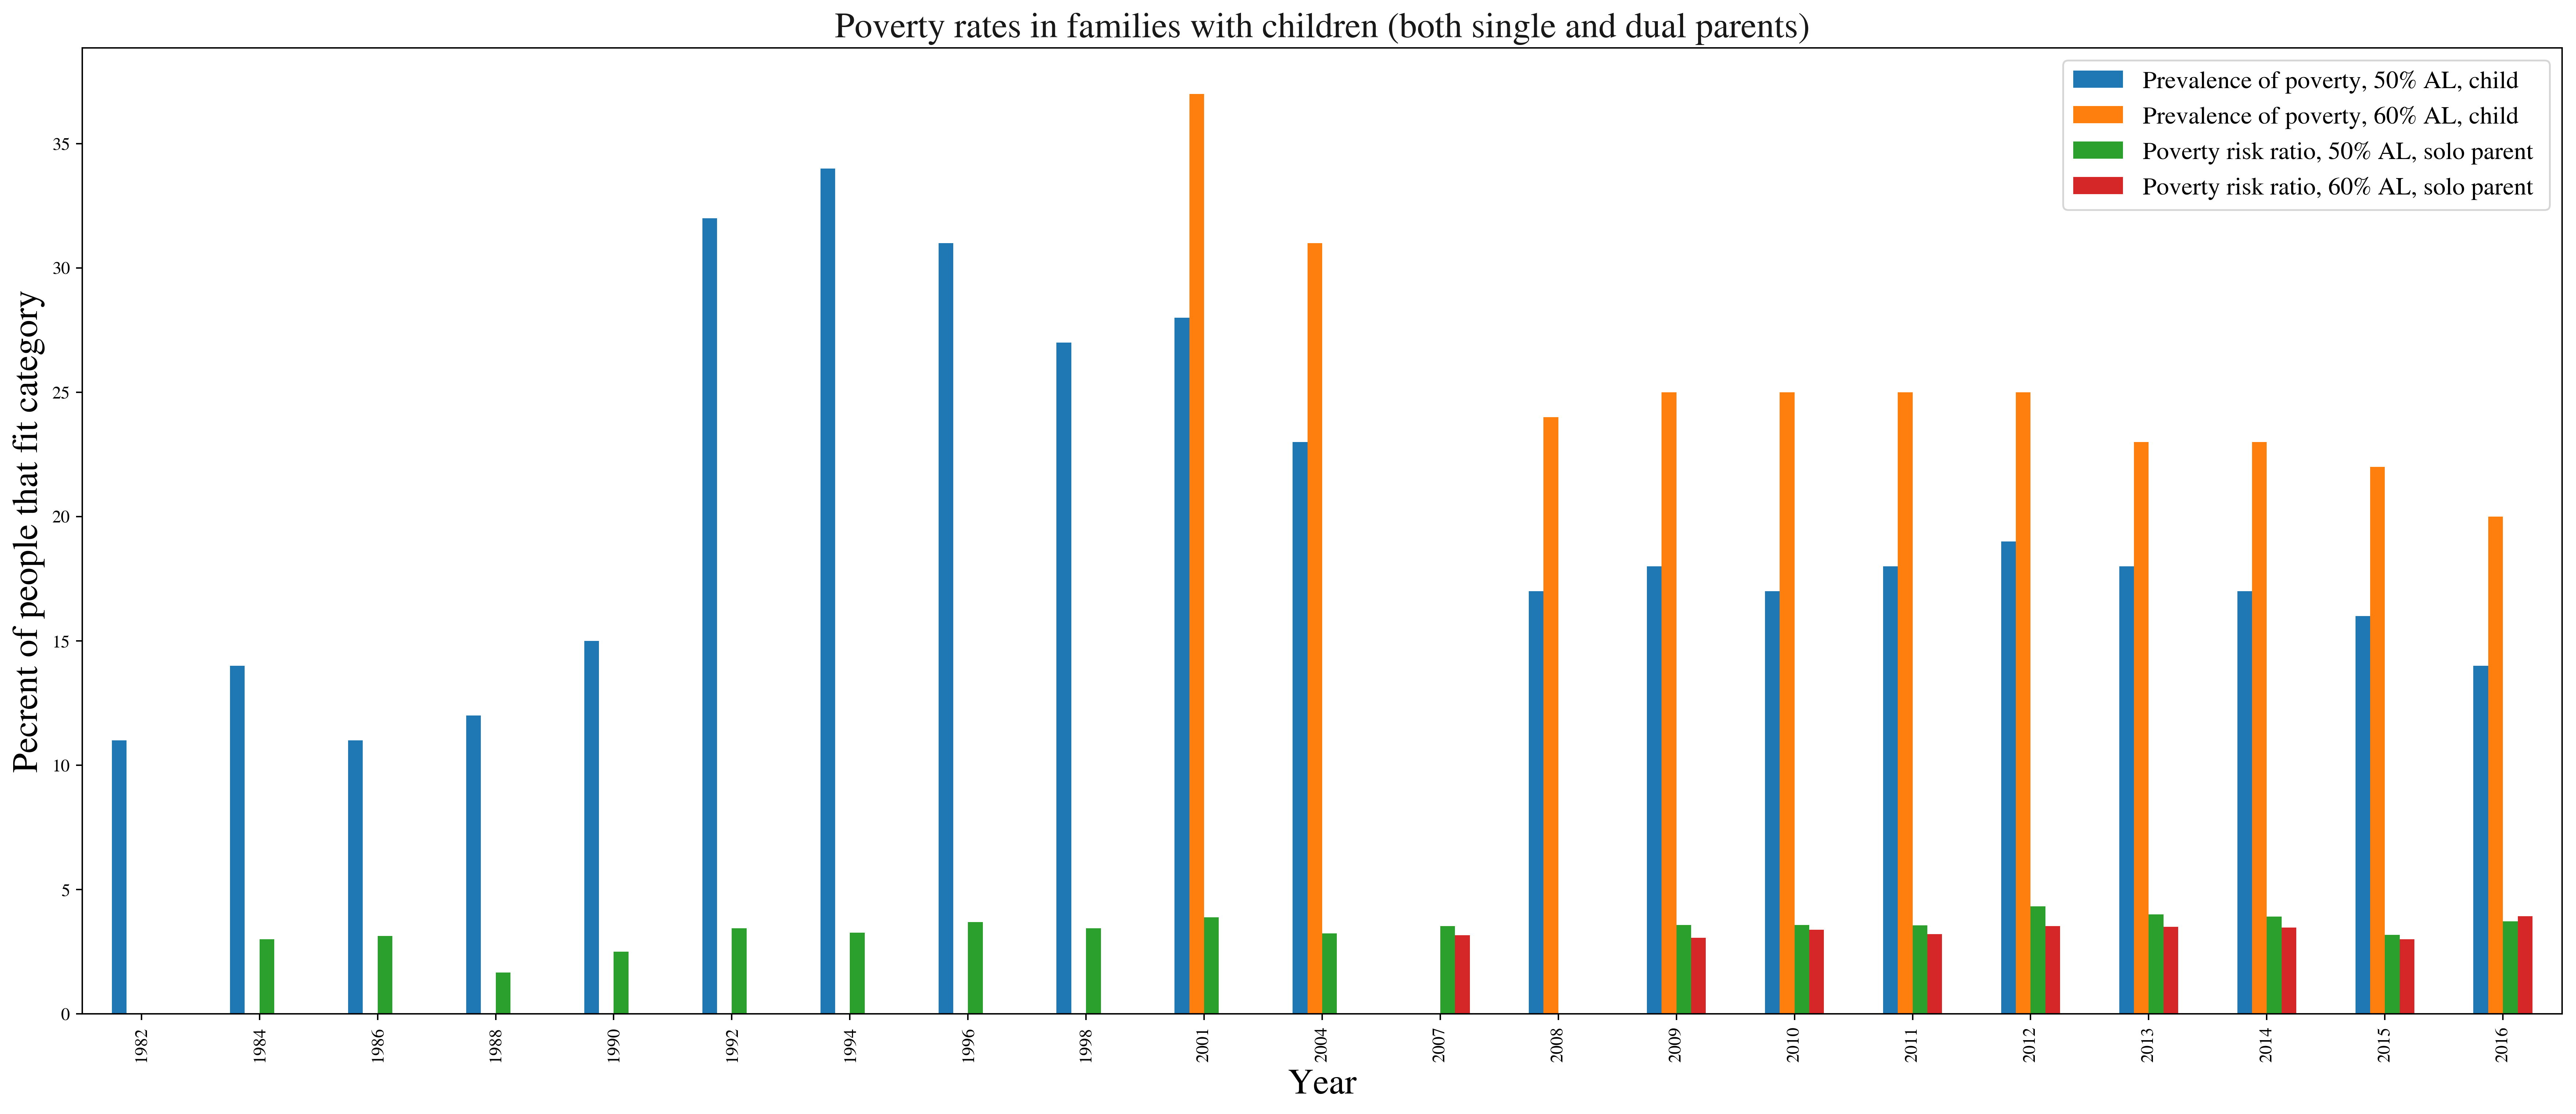

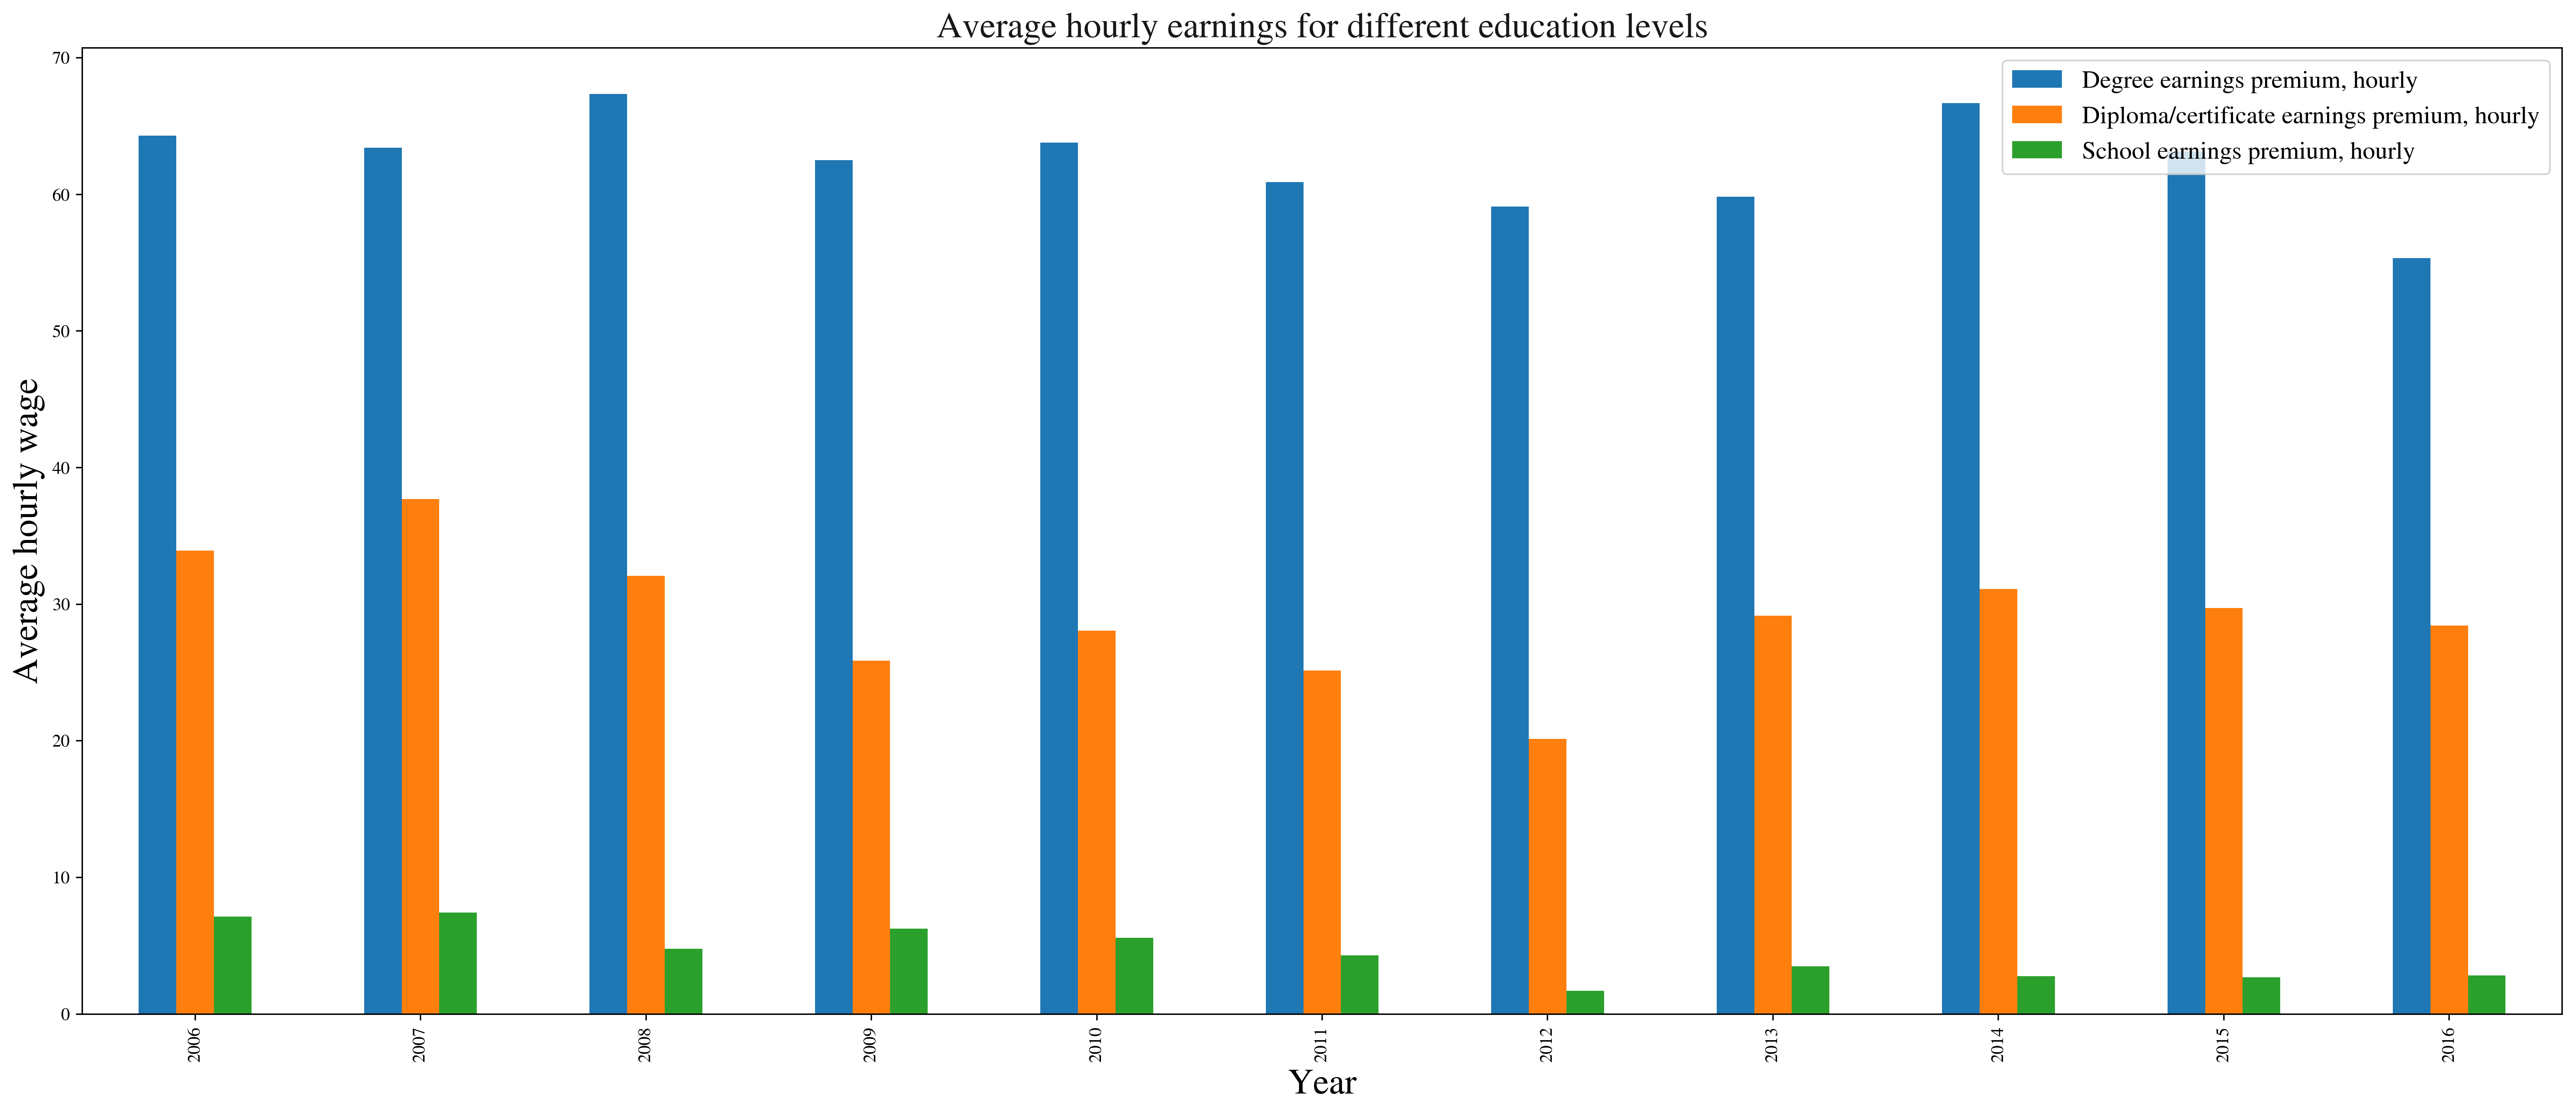

In [15]:

firstSet = pd.DataFrame()
firstSet = firstSet.append(nzPov['Prevalence of poverty 60% AL'])
firstSet = firstSet.append(nzPov['Prevalence of poverty 50% AL'])
firstSet = firstSet.append(nzPov['Prevalence of poverty 40% AL'])
firstSet = firstSet.append(nzEdu['Tertiary education participation'])

firstSet = firstSet.transpose()
firstSet.sort_index(inplace=True)
firstSet.plot(kind = 'bar', figsize=(25,10))
plt.title("Percent of individuals participating in tertiary education vs families earning below % median", alpha=.9, fontsize=20)
plt.ylabel("Pecrent of people that fit category", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.legend(loc=0, prop={'size': 14})


secondSet = pd.DataFrame()
secondSet = secondSet.append(nzEdu['Tertiary loan as a percentage of income'])
secondSet = secondSet.append(nzEdu['University fees to income ratio'])
secondSet = secondSet.append(nzEdu['Polytechnic fees to income ratio'])
secondSet = secondSet.append(nzEdu['Education expenditure, government expenses'])
secondSet = secondSet.append(nzEdu['Education expenditure, GDP'])

secondSet = secondSet.transpose()
secondSet.sort_index(inplace=True)
secondSet.dropna(axis=0, how='all', inplace=True)
secondSet.plot(kind = 'bar', figsize=(25,10))
plt.title("Education fee's as a percentage of income and government expendature on education", alpha=.9, fontsize=20)
plt.ylabel("Pecrent of people that fit category", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.legend(loc=0, prop={'size': 14})


thirdSet = pd.DataFrame()
thirdSet = thirdSet.append(nzPov['Prevalence of poverty, 50% AL, child'])
thirdSet = thirdSet.append(nzPov['Prevalence of poverty, 60% AL, child'])
thirdSet = thirdSet.append(nzPov['Poverty risk ratio, 50% AL, solo parent '])
thirdSet = thirdSet.append(nzPov['Poverty risk ratio, 60% AL, solo parent '])
#thirdSet = thirdSet.append(nzEdu['Polytechnic fees to income ratio'])

thirdSet = thirdSet.transpose()
thirdSet.sort_index(inplace=True)
thirdSet.plot(kind = 'bar', figsize=(25,10))
plt.title("Poverty rates in families with children (both single and dual parents)", alpha=.9, fontsize=20)
plt.ylabel("Pecrent of people that fit category", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.legend(loc=0, prop={'size': 14})


fourthSet = pd.DataFrame()
fourthSet = fourthSet.append(nzEdu['Degree earnings premium, hourly'])
fourthSet = fourthSet.append(nzEdu['Diploma/certificate earnings premium, hourly'])
fourthSet = fourthSet.append(nzEdu['School earnings premium, hourly'])

fourthSet = fourthSet.transpose()
fourthSet.sort_index(inplace=True)
fourthSet.dropna(axis=0, how='all', inplace=True)
fourthSet.plot(kind = 'bar', figsize=(25,10))
plt.title("Average hourly earnings for different education levels", alpha=.9, fontsize=20)
plt.ylabel("Average hourly wage", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.legend(loc=0, prop={'size': 14})


# **Mini-report comparing poverty rates and education**

## Introduction

Access to education is a fundamental right for all peoples.

This report will endeavour to show whether there is a correlation between a person (or families) risk of falling into poverty and their access to education.

I will answer this using the following questions:

   * Is the percentage of people in poverty having an influence on tertiary education participation levels?
   * Is the mean income increase for pursuing higher education worth the short term detriment to funds?
   * Is the high costs of tertiary education creating a barrier to entry for poorer families or individuals?

The data I am using was collected from:
    
   * The ministry of social development
   * The ministry of Education

Both of these are known to be reputable sources and as such the accuracy of the data gathered can be trusted for use in statistical analysis.



## Discussion
**Is the percentage of people in poverty having an influence on tertiary education participation levels?**

The rate of poverty in individuals earning 60% and 50% of the median income at 2007 (anchored line) after housing costs (**Median**) has been decreasing since the late 90's. However the rate of poverty in those earning 40% of the Median has been steadily increasing, so it is possible that some of those that would have been classified under the first two categories have been moved into this lower earning category. The rate of participation in tertiary education was steadily rising between 1997 and 2005, after this however it began once again to decline. These comparissons can be seen in figure 1 'Percent of individuals participating in tertiary education vs families earning below % Median'. In figure 3 'Poverty rates in families with children (both single and dual parents)' the rates of poverty in families with children, both with two parents and those with solo parents is shown. Poverty rates for single parents in both the 60% Median and 50% have shown slight increases in the time frame shown, dual parent rates for the same categories however have reduced.<br>
In both figures dicussed the years 1982-1990 do not match the trends displayed from year 1992 - 2016. This could be due to not all demographics being represented in initial surveys, or due to lack of resources to create an inclusive picture of the state of the specified individuals. <br>
It is also possible that the increase in poverty may have been due to changes in government and the possible austerity measures that resulted afterwards. New Zealands hosting of the common wealth games in 1990 (and the high expenditures that this entails) could have also have had an effect on poverty rates.

**Is the mean income increase for pursuing higher education worth the short term detriment to funds?**

Over the time period provided by this sample set the Median hourly earnings for those who have secondary school as their highest qualification has decreased. The hourly rates of those who have obtained either a diploma or a degree have fluctuated, but stayed around the same point, the 30% and 60% respectively. These are displayed in figure 4 'Average hourly earnings for different education levels'. Shown in figure 2 is the ratio's of fees to income for different education levels (polytechnic and university). Though at the first sample taken in 2000 there was little difference between university and polytechnic in terms of cost to income ratio, the gap widens over the years. This could be due to a reduction in the costs of polytechnic, or more likely an increase in the costs of university fees.<br>
Aside from some small fluctuations, the governments expenditure as a percentage of GDP has stayed more or less the same. The same can be said refering to the governments percentage expendature on education, though this has shown more fluctuation.

**Is the high costs of tertiary education creating a barrier to entry for poorer families or individuals?**

Based on the information available this is a harder factor to gauge. It is possible that the lowered rates of poverty in the 60% Median and 50% Median brackets could be due to more access to higher education, resulting in higher Median wage. It is also possible that the lowering rates in these two populations are due to the increasing rate of individuals in the 40% Median bracket, though the numbers do not directly support this. The lowered fees to income ratio for polytechnic schools may be encouraging more individuals to move into qualified trade industries, the dip in wage from 2009-2012 could support this as a surge in people attending polytechnic may have flooded the market with people of similar skills thus increasing supply and reducing demand. Based on the data supplied there is no strong evidence to suggest the costs of education are providing a barrier to poorer familes. Access to scholarship, fees free loans and student allowance may help to offset these numbers and concerns.


## Conclusions

**1)** Based on the data provided there does not appear to be any strong correlation between a family being at risk of poverty and their being unable to access tertiary education. Though the accuracy of this is hard to judge as New Zealand has shown a rapid growth in population (3.1 million in 1980 to 4.7 million in 2016) over the time period studied in these data sets.

**2)** There is clear evidence in the graphs shown above that there is a large disparity between the average Median incomes of those who have obtained higher education of any form. Although the percentage of income that must be paid back due to loans is high (around 25%) the long term income gains from higher education outweigh this.

**3)** Participation in tertiary education is likely to fluctuate from year to year. Although from 2008 to 2016 there has been an increase in the prevalance of poverty in those earning 40% and a decrease from in tertiary education participation over the same time period, there is not enough evidence to say that one factor is influencing the other.